In [4]:
l = ["a", "b", "c"]
l.append("d")
print(l)
l[1] = "e"
print(l)
l.pop(0)
print(l)

['a', 'b', 'c', 'd']
['a', 'e', 'c', 'd']
['e', 'c', 'd']


In [4]:
n=5
for i in range(n):
    for j in range(n):
        print("*",end=" ")
    print()

* * * * * 
* * * * * 
* * * * * 
* * * * * 
* * * * * 


In [2]:
import glob
import os
image_root = r"E:\Mars_Dust_Storm\Mars 2.0\Files"
for folder in os.listdir(image_root):
    folder_path = os.path.join(image_root, folder)
    if os.path.isdir(folder_path):
        images = glob.glob(os.path.join(folder_path, "*.png"))  # Check all PNGs
        print(f"{folder}: {images[:5]}")  # Print first 5 images per folder


s20: []
s22: []


In [1]:
import pandas as pd

df = pd.read_csv(r"D:\MDAD.csv")

print(df.head()) 

   Mars Year Mission subphase  Sol     Ls  Centroid longitude  \
0         29              B01    1  120.9               28.85   
1         29              B01    2  121.4               29.65   
2         29              B01    2  121.4             -117.05   
3         29              B01    3  121.8               36.05   
4         29              B01    3  121.8             -146.55   

   Centroid latitude  Area (square km) Member ID Sequence ID  \
0           76.95000         90356.984   B01_001         NaN   
1           74.25000        156925.090   B01_001         NaN   
2           -7.64999         35037.652   B01_004         NaN   
3           71.75000        209257.090   B01_001         NaN   
4           77.65000        186898.530   B01_006         NaN   

   Maximum latitude  Minimum latitude  Confidence interval Missing data  
0             83.25             71.35                   75           no  
1             81.95             66.85                   50           no  
2 

In [1]:
from PIL import Image
img = Image.open(r"E:\Mars_Dust_Storm\Mars 2.0\data_P01\P01_day01.tiff")
print(img.size, img.mode)


(3600, 1801) RGB


In [ ]:
import pandas as pd

Mars_Dust_Storm\Mars 2.0\P01.csv"
df = pd.read_csv(CSV_PATH)

print(df.head()) 
print(df.info())   
print(df.describe())CSV_PATH = r"E:\


   Mars Year Mission subphase  Sol     Ls  Centroid longitude  \
0         28              P01    1  132.5           -98.95000   
1         28              P01    1  132.5            62.45000   
2         28              P01    1  132.5            64.15000   
3         28              P01    2  132.9            -7.84999   
4         28              P01    2  132.9          -100.35000   

   Centroid latitude  Area (square km) Member ID Sequence ID  \
0             -12.65         67220.750   P01_011         NaN   
1             -22.45        947610.440   P01_014         NaN   
2             -45.65        449700.340   P01_015         NaN   
3              77.05         49225.062   P01_002         NaN   
4             -15.05        134387.690   P01_011         NaN   

   Maximum latitude  Minimum latitude  Confidence interval Missing data  
0          -9.74999            -14.85                  100           no  
1         -15.55000            -28.95                   75           no  
2 

In [3]:
import pandas as pd

CSV_PATH = r"E:\Mars_Dust_Storm\Mars 2.0\P01.csv"
CLEANED_CSV_PATH = r"E:\Mars_Dust_Storm\Mars 2.0\P01_cleaned.csv"

# Load CSV
df = pd.read_csv(CSV_PATH)

#  1. Remove unnecessary columns
df = df[['Sol', 'Centroid longitude', 'Centroid latitude', 'Confidence interval']]

#  2. Handle missing values
df.dropna(subset=['Sol', 'Centroid longitude', 'Centroid latitude', 'Confidence interval'], inplace=True)

#  3. Convert data types (Ensure 'Sol' is string for filenames)
df['Sol'] = df['Sol'].astype(str).str.zfill(2)  # Ensures "1" → "01"

#  4. Validate numerical ranges
df = df[(df['Centroid longitude'] >= -180) & (df['Centroid longitude'] <= 180)]
df = df[(df['Centroid latitude'] >= -90) & (df['Centroid latitude'] <= 90)]
df = df[(df['Confidence interval'] >= 50) & (df['Confidence interval'] <= 100)]

# 5. Save cleaned CSV
df.to_csv(CLEANED_CSV_PATH, index=False)

print("Cleaned CSV saved at:", CLEANED_CSV_PATH)


Cleaned CSV saved at: E:\Mars_Dust_Storm\Mars 2.0\P01_cleaned.csv


In [4]:
import os
import pandas as pd

CLEANED_CSV_PATH = r"E:\Mars_Dust_Storm\Mars 2.0\P01_cleaned.csv"
IMAGE_DIR = r"E:\Mars_Dust_Storm\Mars 2.0\data_P01"

# Load cleaned CSV
df = pd.read_csv(CLEANED_CSV_PATH)

# Fix filename format (Ensure zero-padding for single-digit days)
df['Image Name'] = df['Sol'].apply(lambda x: f"P01_day{int(x):02d}.tiff")  # Zero-pad day numbers

# Check existence of each image
missing_images = []
for img_name in df['Image Name'].unique():
    img_path = os.path.join(IMAGE_DIR, img_name)
    if not os.path.exists(img_path):
        missing_images.append(img_name)

# Display results
if missing_images:
    print("Missing Images:", missing_images)
else:
    print("All required images are available!")


All required images are available!


In [5]:
import os
import json
import pandas as pd
from PIL import Image

# Paths
CSV_PATH = r"E:\Mars_Dust_Storm\Mars 2.0\P01_cleaned.csv"
IMAGE_DIR = r"E:\Mars_Dust_Storm\Mars 2.0\data_P01"
OUTPUT_DIR = r"E:\Mars_Dust_Storm\Mars 2.0\mask_output"
ANNOTATIONS_PATH = os.path.join(OUTPUT_DIR, "coco_annotations.json")

# Ensure output directory exists
os.makedirs(OUTPUT_DIR, exist_ok=True)

# Load CSV
df = pd.read_csv(CSV_PATH)

# Initialize COCO annotation structure
coco_data = {
    "images": [],
    "annotations": [],
    "categories": [{"id": 1, "name": "dust_storm"}]
}

# Function to convert geo-coordinates to pixel coordinates
def geo_to_pixel(lon, lat, img_width, img_height):
    x = int((lon + 180) * (img_width / 360))
    y = int((90 - lat) * (img_height / 180))
    return x, y

annotation_id = 1  # Unique ID for each annotation

# Fix filename format (Ensure zero-padding for single-digit days)
df['Image Name'] = df['Sol'].apply(lambda x: f"P01_day{int(x):02d}.tiff")

# Process each unique image
for img_name in df['Image Name'].unique():
    img_path = os.path.join(IMAGE_DIR, img_name)
    
    if not os.path.exists(img_path):
        print(f"⚠️ Skipping {img_name} (Image not found)")
        continue
    
    # Open image to get dimensions
    try:
        pil_img = Image.open(img_path).convert("RGB")
        img_width, img_height = pil_img.size
    except Exception as e:
        print(f"🚨 Error opening {img_name}: {str(e)}. Skipping...")
        continue

    # Add image info to COCO format
    coco_data["images"].append({
        "file_name": img_name,
        "height": img_height,
        "width": img_width,
        "id": img_name
    })

    # Process dust storms in this image
    image_storms = df[df["Image Name"] == img_name]
    for _, row in image_storms.iterrows():
        try:
            centroid_lon = float(row['Centroid longitude'])
            centroid_lat = float(row['Centroid latitude'])

            # Define bounding box (120×120 pixels)
            box_size = 120
            x1, y1 = geo_to_pixel(centroid_lon, centroid_lat, img_width, img_height)
            x1 -= box_size // 2
            y1 -= box_size // 2
            x2, y2 = x1 + box_size, y1 + box_size

            # Ensure valid bounding box
            x1, y1 = max(0, x1), max(0, y1)
            x2, y2 = min(img_width - 1, x2), min(img_height - 1, y2)
            if x1 >= x2 or y1 >= y2:
                print(f"⚠️ Invalid bounding box for {img_name}, skipping.")
                continue

            # Add annotation
            coco_data["annotations"].append({
                "id": annotation_id,
                "image_id": img_name,
                "category_id": 1,
                "bbox": [x1, y1, x2 - x1, y2 - y1],
                "area": (x2 - x1) * (y2 - y1),
                "iscrowd": 0
            })
            annotation_id += 1

        except Exception as e:
            print(f"🚨 Error processing storm in {img_name}: {str(e)}")

# Save annotations to JSON
with open(ANNOTATIONS_PATH, 'w') as f:
    json.dump(coco_data, f, indent=4)

print("\n COCO annotation generation complete! JSON saved at:", ANNOTATIONS_PATH)



 COCO annotation generation complete! JSON saved at: E:\Mars_Dust_Storm\Mars 2.0\mask_output\coco_annotations.json


In [6]:
import json

ANNOTATIONS_PATH = r"E:\Mars_Dust_Storm\Mars 2.0\mask_output\coco_annotations.json"

# Load JSON
with open(ANNOTATIONS_PATH, 'r') as f:
    data = json.load(f)

# Print basic structure
print(json.dumps(data, indent=4))

# Check key contents
print("\n🔹 Total Images:", len(data['images']))
print("🔹 Total Annotations:", len(data['annotations']))
print("🔹 Categories:", data['categories'])


{
    "images": [
        {
            "file_name": "P01_day01.tiff",
            "height": 1801,
            "width": 3600,
            "id": "P01_day01.tiff"
        },
        {
            "file_name": "P01_day02.tiff",
            "height": 1801,
            "width": 3600,
            "id": "P01_day02.tiff"
        },
        {
            "file_name": "P01_day03.tiff",
            "height": 1801,
            "width": 3600,
            "id": "P01_day03.tiff"
        },
        {
            "file_name": "P01_day04.tiff",
            "height": 1801,
            "width": 3600,
            "id": "P01_day04.tiff"
        },
        {
            "file_name": "P01_day05.tiff",
            "height": 1801,
            "width": 3600,
            "id": "P01_day05.tiff"
        },
        {
            "file_name": "P01_day06.tiff",
            "height": 1801,
            "width": 3600,
            "id": "P01_day06.tiff"
        },
        {
            "file_name": "P01_day07.tiff",
     

In [7]:
import cv2
import json
import os

# Paths
IMAGE_DIR = r"E:\Mars_Dust_Storm\Mars 2.0\data_P01"
ANNOTATIONS_PATH = r"E:\Mars_Dust_Storm\Mars 2.0\mask_output\coco_annotations.json"
OUTPUT_DIR = r"E:\Mars_Dust_Storm\Mars 2.0\validation_output"

# Load JSON file
with open(ANNOTATIONS_PATH, 'r') as f:
    coco_data = json.load(f)

# Create output directory if not exists
os.makedirs(OUTPUT_DIR, exist_ok=True)

# Process each image
for img_info in coco_data['images']:
    img_name = img_info['file_name']
    img_path = os.path.join(IMAGE_DIR, img_name)
    
    # Check if image exists
    if not os.path.exists(img_path):
        print(f"⚠️ Skipping {img_name}, not found.")
        continue

    img = cv2.imread(img_path)
    
    # Draw annotations
    for ann in coco_data['annotations']:
        if ann['image_id'] == img_info['id']:
            x, y, w, h = ann['bbox']
            cv2.rectangle(img, (int(x), int(y)), (int(x + w), int(y + h)), (0, 255, 0), 2)

    # Save annotated image
    output_path = os.path.join(OUTPUT_DIR, f"checked_{img_name}")
    cv2.imwrite(output_path, img)
    print(f"Saved {output_path}")

print("\n✨ Annotation verification complete! Check the validation_output folder.")


Saved E:\Mars_Dust_Storm\Mars 2.0\validation_output\checked_P01_day01.tiff
Saved E:\Mars_Dust_Storm\Mars 2.0\validation_output\checked_P01_day02.tiff
Saved E:\Mars_Dust_Storm\Mars 2.0\validation_output\checked_P01_day03.tiff
Saved E:\Mars_Dust_Storm\Mars 2.0\validation_output\checked_P01_day04.tiff
Saved E:\Mars_Dust_Storm\Mars 2.0\validation_output\checked_P01_day05.tiff
Saved E:\Mars_Dust_Storm\Mars 2.0\validation_output\checked_P01_day06.tiff
Saved E:\Mars_Dust_Storm\Mars 2.0\validation_output\checked_P01_day07.tiff
Saved E:\Mars_Dust_Storm\Mars 2.0\validation_output\checked_P01_day08.tiff
Saved E:\Mars_Dust_Storm\Mars 2.0\validation_output\checked_P01_day09.tiff
Saved E:\Mars_Dust_Storm\Mars 2.0\validation_output\checked_P01_day10.tiff
Saved E:\Mars_Dust_Storm\Mars 2.0\validation_output\checked_P01_day11.tiff
Saved E:\Mars_Dust_Storm\Mars 2.0\validation_output\checked_P01_day12.tiff
Saved E:\Mars_Dust_Storm\Mars 2.0\validation_output\checked_P01_day13.tiff
Saved E:\Mars_Dust_Storm\

Epoch [1/5], Loss: 29.2415
Epoch [2/5], Loss: 11.4554
Epoch [3/5], Loss: 7.5832
Epoch [4/5], Loss: 5.8908
Epoch [5/5], Loss: 5.8963

✅ Training Completed!

✅ Model saved to E:\Mars_Dust_Storm\mask_rcnn_model.pth


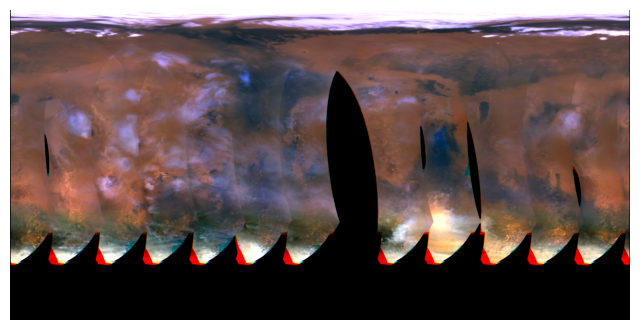

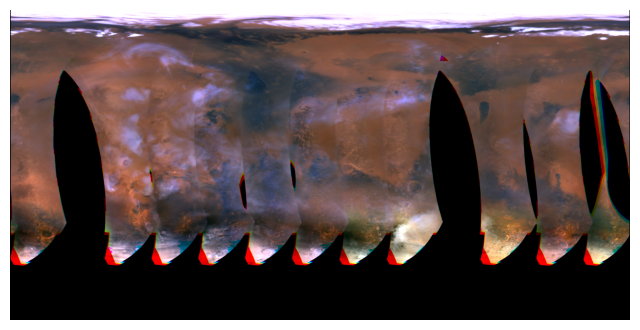

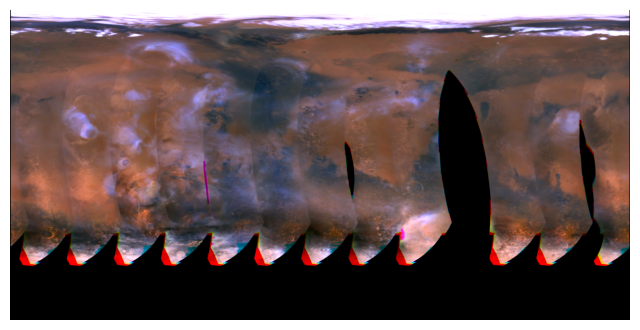

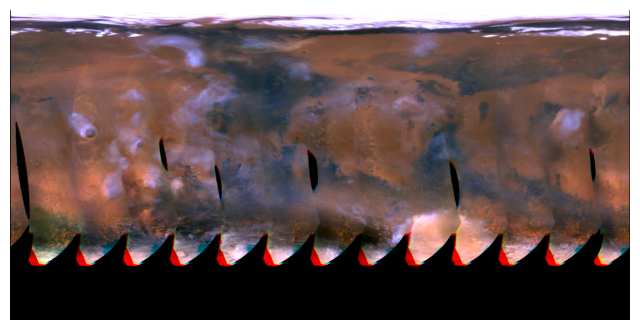

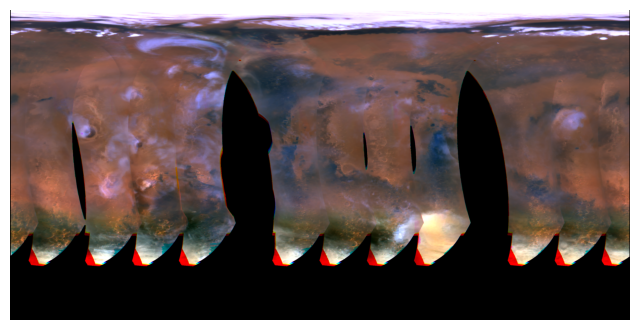


✅ Inference completed. Check the visualized results.


In [2]:
import os
import cv2
import torch
import numpy as np
import torchvision
import torchvision.transforms.functional as F
from torch.utils.data import Dataset, DataLoader
from torchvision.models.detection import maskrcnn_resnet50_fpn
import json
import matplotlib.pyplot as plt

# =======================
# 📌 PATHS
# =======================
IMAGE_DIR = r"E:\Mars_Dust_Storm\Mars 2.0\data_P01"
ANNOTATIONS_PATH = r"E:\Mars_Dust_Storm\Mars 2.0\mask_output\coco_annotations.json"
OUTPUT_DIR = r"E:\Mars_Dust_Storm\Mars 2.0\validation_output"
MODEL_SAVE_PATH = r"E:\Mars_Dust_Storm\mask_rcnn_model.pth"

# Create output directory if not exists
os.makedirs(OUTPUT_DIR, exist_ok=True)

# =======================
# 📌 Dataset Class
# =======================
class DustStormDataset(Dataset):
    def __init__(self, image_dir, annotation_path):
        self.image_dir = image_dir
        with open(annotation_path, 'r') as f:
            coco_data = json.load(f)
        
        self.images = coco_data['images']
        self.annotations = {ann['image_id']: [] for ann in coco_data['annotations']}
        for ann in coco_data['annotations']:
            self.annotations[ann['image_id']].append(ann)

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img_info = self.images[idx]
        img_path = os.path.join(self.image_dir, img_info['file_name'])
        
        # Read image and convert to RGB
        image = cv2.imread(img_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  
        image = torch.tensor(image, dtype=torch.float32).permute(2, 0, 1) / 255.0  # Convert to tensor

        # Get annotations
        annotations = self.annotations.get(img_info['id'], [])
        boxes, masks, labels = [], [], []

        for ann in annotations:
            x, y, w, h = ann['bbox']
            boxes.append([x, y, x + w, y + h])
            mask = np.zeros((img_info['height'], img_info['width']), dtype=np.uint8)
            masks.append(mask)
            labels.append(1)  # Label 1 for dust storm

        # Convert to tensors
        boxes = torch.as_tensor(boxes, dtype=torch.float32)
        labels = torch.as_tensor(labels, dtype=torch.int64)
        masks = torch.as_tensor(masks, dtype=torch.uint8)

        target = {"boxes": boxes, "labels": labels, "masks": masks}

        return image, target

# =======================
# 📌 Load Dataset
# =======================
dataset = DustStormDataset(IMAGE_DIR, ANNOTATIONS_PATH)
dataloader = DataLoader(dataset, batch_size=2, shuffle=True, collate_fn=lambda x: tuple(zip(*x)))

# =======================
# 📌 Load Mask R-CNN Model
# =======================
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = maskrcnn_resnet50_fpn(pretrained=True)
in_features = model.roi_heads.box_predictor.cls_score.in_features
model.roi_heads.box_predictor = torchvision.models.detection.faster_rcnn.FastRCNNPredictor(in_features, num_classes=2)
model.to(DEVICE)

# =======================
# 📌 Define Optimizer & Loss
# =======================
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# =======================
# 📌 Training Function
# =======================
def train_model(model, dataloader, num_epochs=5):
    model.train()
    for epoch in range(num_epochs):
        total_loss = 0
        for images, targets in dataloader:
            images = [img.to(DEVICE) for img in images]
            targets = [{k: v.to(DEVICE) for k, v in t.items()} for t in targets]

            optimizer.zero_grad()
            loss_dict = model(images, targets)
            losses = sum(loss for loss in loss_dict.values())
            losses.backward()
            optimizer.step()
            total_loss += losses.item()

        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {total_loss:.4f}")

    print("\n✅ Training Completed!")

# =======================
# 📌 Train Model
# =======================
train_model(model, dataloader, num_epochs=5)

# =======================
# 📌 Save Model
# =======================
torch.save(model.state_dict(), MODEL_SAVE_PATH)
print(f"\n✅ Model saved to {MODEL_SAVE_PATH}")

# =======================
# 📌 Load Trained Model for Inference
# =======================
model.load_state_dict(torch.load(MODEL_SAVE_PATH))
model.eval()

# =======================
# 📌 Inference Function
# =======================
def predict(model, image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image_tensor = torch.tensor(image, dtype=torch.float32).permute(2, 0, 1) / 255.0
    image_tensor = image_tensor.unsqueeze(0).to(DEVICE)

    with torch.no_grad():
        prediction = model(image_tensor)[0]

    return prediction

# =======================
# 📌 Visualize Results
# =======================
def visualize_prediction(image_path, prediction, threshold=0.5):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    for i in range(len(prediction["scores"])):
        if prediction["scores"][i] > threshold:
            x1, y1, x2, y2 = map(int, prediction["boxes"][i].tolist())
            mask = prediction["masks"][i, 0].mul(255).byte().cpu().numpy()
            mask = cv2.resize(mask, (image.shape[1], image.shape[0]))
            
            image[mask > 128] = [255, 0, 0]  # Apply mask (Red)
            cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

    plt.figure(figsize=(8, 8))
    plt.imshow(image)
    plt.axis("off")
    plt.show()

# =======================
# 📌 Run Inference & Save Results
# =======================
test_images = os.listdir(IMAGE_DIR)[:5]  # Test on first 5 images
for test_image in test_images:
    test_path = os.path.join(IMAGE_DIR, test_image)
    pred = predict(model, test_path)
    visualize_prediction(test_path, pred)

print("\n✅ Inference completed. Check the visualized results.")


In [ ]:
import torch
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from torchvision import transforms
from torchvision.models.detection import maskrcnn_resnet50_fpn

# Paths
TEST_IMAGE_DIR = r"E:\Mars_Dust_Storm\Mars 2.0\data_P01"
MODEL_PATH = r"E:\Mars_Dust_Storm\mask_rcnn_model.pth"
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load trained model
def get_model_instance_segmentation(num_classes):
    model = maskrcnn_resnet50_fpn(pretrained=False, num_classes=num_classes)
    return model

# Define number of classes
num_classes = 2  # Change this to match your training

# Initialize model with correct number of classes
model = get_model_instance_segmentation(num_classes=num_classes)

# Load trained weights, ignoring incompatible layers
state_dict = torch.load(MODEL_PATH, map_location=DEVICE)

# Remove incompatible keys
state_dict.pop("roi_heads.mask_predictor.mask_fcn_logits.weight", None)
state_dict.pop("roi_heads.mask_predictor.mask_fcn_logits.bias", None)

# Load the modified state dict
model.load_state_dict(state_dict, strict=False)

# Manually reinitialize the missing layers
in_features_mask = model.roi_heads.mask_predictor.conv5_mask.in_channels
model.roi_heads.mask_predictor.mask_fcn_logits = torch.nn.Conv2d(
    in_features_mask, num_classes, kernel_size=(1, 1), stride=(1, 1)
)

# Move model to device
model.to(DEVICE)
model.eval()

# Define transformation
transform = transforms.Compose([transforms.ToTensor()])

# Function to visualize predictions
def visualize_predictions(image_path, model, threshold=0.0):  # Lower threshold to 0.0 for all predictions
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image_tensor = transform(image_rgb).to(DEVICE)

    # Perform inference
    with torch.no_grad():
        prediction = model([image_tensor])[0]

    # Debug: Check if any predictions exist
    print(f"Predictions for {os.path.basename(image_path)}:")
    print(f"Boxes: {prediction['boxes']}")
    print(f"Scores: {prediction['scores']}")
    print(f"Masks: {prediction['masks']}")

    # Create a mask to overlay on image
    overlay = image_rgb.copy()

    # Draw bounding boxes and masks
    for box, score, mask in zip(prediction['boxes'], prediction['scores'], prediction['masks']):
        if score > threshold:
            x1, y1, x2, y2 = map(int, box.tolist())
            cv2.rectangle(image_rgb, (x1, y1), (x2, y2), (0, 255, 0), 2)

            # Process mask
            mask = mask[0].mul(255).byte().cpu().numpy()
            mask_resized = cv2.resize(mask, (image_rgb.shape[1], image_rgb.shape[0]))

            # Apply mask to the overlay image
            mask_colored = np.zeros_like(overlay)
            mask_colored[:, :, 2] = mask_resized  # Red mask

            # Combine the mask with the overlay using weighted addition
            alpha = 0.5  # Transparency of mask
            cv2.addWeighted(mask_colored, alpha, overlay, 1 - alpha, 0, overlay)

    # Show final image with bounding boxes and mask
    plt.figure(figsize=(8, 8))
    plt.imshow(overlay)
    plt.axis("off")
    plt.title(f"Predictions for {os.path.basename(image_path)}")
    plt.show()

# Test on first 3 images
test_images = sorted(os.listdir(TEST_IMAGE_DIR))[:3]  # Pick first 3 images
for img_name in test_images:
    img_path = os.path.join(TEST_IMAGE_DIR, img_name)
    visualize_predictions(img_path, model, threshold=0.0)  # Set threshold to 0.0 for all predictions
